This module deals with fitting of a function to a data and finding the location of the minimum value. 

This example can be used for slices of huge data or images where finding the minimum value and location can be difficult or is dynamically obtained when the required pattern is in motion.

- Gauss Fitting of data to a function. 

[ 99.92982483 -25.40918483   1.61687307]


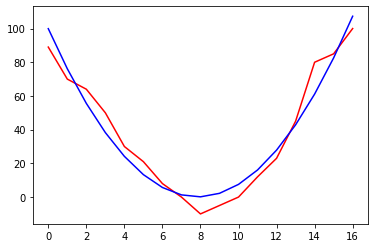

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize as optimization
import cv2
%matplotlib inline

# Random values in parabolic fashion
xdata = np.array([89,70,64,50,30,21,8,0,-10,-5,0,12,23,45,80,85,100])
ydata = np.arange(len(xdata))

x = ydata
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])

def func(x, a, b, c):
    '''
    Description: This function takes in a value of array containing the indices(x), coeffecients a, b and c and perform 
    fitting of data to the mentioned function
    
    Arguments:
    
    x - a numerical value of x 
    a - coeffecient of function (float)
    b - coeffecient of function (float)
    b - coeffecient of function (float)
    
    Returns:
    
    a + b*x + c*x*x - a numerical array containing the fit of the data
    
    '''
        
    return a + b*x + c*x*x



popt, pcov = optimization.curve_fit(func, ydata, xdata, x0)
print(popt)
plt.plot(xdata,'-r')
data = func(ydata,*popt)
plt.plot(data,'-b')
plt.show()


- Deriavative of function

In [2]:
def deriv(x,a,b,c):
    
    '''
    Description: This function takes in a value of x and returns its derivative based on the 
    initial function we specified.
    
    Arguments:
    
    x - a numerical value of x 
    
    Returns:
    
    x_deriv - a numerical value of the derivative of x
    
    '''
    
    x_deriv = b + 2*c*x
    return x_deriv

- Gradient Descent

In [3]:
#https://www.tech-quantum.com/implementation-of-gradient-descent-in-python/

def step(x_new, x_prev, precision, l_r,a,b,c):
     
    xnew = []
    ynew = []
    
    while abs(x_new - x_prev) > precision:
        
        x_prev = x_new
        
        x_new = x_new + l_r * deriv(x_new,a,b,c)*-1
        y_new = func(x_new,a,b,c)
        xnew.append(x_new)
        ynew.append(y_new)
    
    
    #print(ynew,xnew)
    plt.scatter(xnew,ynew,c ='b')
    plt.plot(xnew,ynew,'b')
    plt.plot(data,'-r')
    plt.show()
    

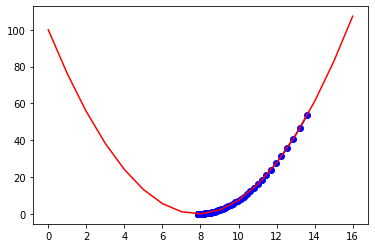

In [5]:
#Implement gradient descent (all the arguments are arbitrarily chosen)
step(14, 16, 0.001, 0.02,popt[0],popt[1],popt[2])

In [ ]:
img = cv2.matchTemplate()